<a href="https://colab.research.google.com/github/ksknysn/BuyingCar/blob/main/passat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#you should crawl webpages or download(i downloaded)
with open("/content/sample_data/passat.html") as fp:
  soup = BeautifulSoup(fp, "html.parser")

In [4]:
#start to scrap the webpage
table1 = soup.find_all("tr",class_="searchResultsItem")
#fill an numpy array with car features
data1 = np.empty(shape=(1,6),dtype='<U4')

In [5]:
#scrapping html table
for row in table1:

    try:
        photo = row.find("td",class_="searchResultsLargeThumbnail")

        features1 = row.find_all("td",class_="searchResultsTagAttributeValue")
        brand = re.split("\n", features1[0].text)[1].replace(' ','')
        serial = re.split("\n", features1[1].text)[1].replace(' ','')
        model = re.split("\n", features1[2].text)[1].replace(' ','')

        notice = row.find("td",class_="searchResultsTitleValue").text
        notice = re.split("\n", notice)

        features2 = row.find_all("td",class_="searchResultsAttributeValue")
        year = int(re.split("\n",features2[0].text)[1].replace(' ',''))
        km = int(re.split("\n",features2[1].text)[1][:-4].replace(' ',''))

        
        price = row.find("td", class_="searchResultsPriceValue").text
        price = int(re.split("\n", price)[1][:-7].replace('.',''))
        #print(brand, serial, model, year, km, price)
        
    except:
        None

    
    e = np.array([[brand, serial, model, year, km, price]])
    c = np.vstack((data1, e))
    data1 = c

In [6]:
#filled array list, we will create a pandas dataframe with this list
data1

array([['', '', '', '', '', ''],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionHighline', '2016',
        '105', '607'],
       ['Volkswagen', 'Passat', '2.0TDIBlueMotionHighline', '2013',
        '192', '422'],
       ['Volkswagen', 'Golf', '1.4TSIHighline', '2013', '135', '405'],
       ['Volkswagen', 'Golf', '1.4TSIHighline', '2013', '135', '405'],
       ['Volkswagen', 'Polo', '1.2TSIComfortline', '2017', '42', '297'],
       ['Volkswagen', 'VWCC', '2.0TDI', '2012', '169', '298'],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionTrendline', '2017',
        '120', '437'],
       ['Volkswagen', 'Passat', '1.6Exclusive', '2005', '176', '136'],
       ['Volkswagen', 'Passat', '1.4TSIBlueMotionComfortline', '2017',
        '33', '605'],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionRLine', '2017', '108',
        '642'],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionComfortline', '2015',
        '172', '510'],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionHighline', '2017',
 

In [7]:
#remove the first row while we added to creat numpy list
data1 = np.delete(data1,0,0)
#create pandas dataframe
df = pd.DataFrame(data1,columns=('brand','serial', 'model','year','km','price'))
#convert to int some features to analyze
df = df.astype({'year':int, 'km':int, 'price':int})

In [8]:
df.size

126

In [9]:
#filter just passat seri
Passat = df.loc[df['serial'] == 'Passat']

In [10]:
Passat.head()

,brand,serial,model,year,km,price
0,Volkswagen,Passat,1.6TDIBlueMotionHighline,2016,105,607
1,Volkswagen,Passat,2.0TDIBlueMotionHighline,2013,192,422
6,Volkswagen,Passat,1.6TDIBlueMotionTrendline,2017,120,437
7,Volkswagen,Passat,1.6Exclusive,2005,176,136
8,Volkswagen,Passat,1.4TSIBlueMotionComfortline,2017,33,605


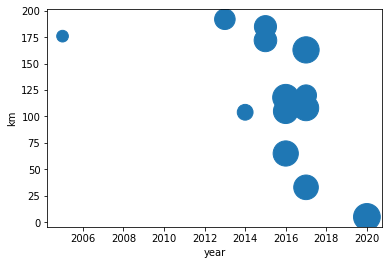

In [11]:
#i choose the scatter plot
Passat.plot.scatter(x='year',y='km',s='price')

Conclusion: You can see a car that is the second lowest price while its model is newer than two car and its km is lower than more than 7 cars. so you can choose that car to buy after looking other qualifications(like accidents etc.)

In [12]:
print(Passat.loc[Passat['year']==2013])
print(Passat.loc[Passat['year']==2014])

        brand  serial                     model  year   km  price
1  Volkswagen  Passat  2.0TDIBlueMotionHighline  2013  192    422
         brand  serial                        model  year   km  price
16  Volkswagen  Passat  1.4TSIBlueMotionComfortline  2014  104    249


First car is 2013, 192 km and 422k but the second one is 2014, 104 km and 249k. So, we should choose the second one. shouldn't we?